In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime
from binance import Client, ThreadedWebsocketManager,ThreadedDepthCacheManager

In [3]:
# Little function to keep track of code execution.
def Keep_Track():
    print("Executed successfully. " + datetime.now().strftime("%a %d %b @ %H:%M:%S") + "\n")

In [11]:
top_mkt = pd.read_excel('../TopMarket_Cap.xlsx')
tickers = list(top_mkt.symbol+'USDT')

In [12]:
## remove symbol that doesn't has data
tickers.remove('FLOWUSDT')
tickers.remove('DAIUSDT')

In [13]:
l={}
kline_interval='1HOUR'
for tkrs in tickers:    
    df = pd.read_feather(os.path.join('../data',f'{tkrs}_{kline_interval}.feather'))
    df = df.set_index('Open Time')
    l[tkrs]=df.Close
    #print(f'load {tkrs}_{interval}.feather')

In [14]:
closes = pd.DataFrame(l)

In [17]:
def get_hurst(series):
    # Calculate Hurst exponent
    hurst_value = compute_Hc(series.dropna(), kind='price')[0]
    return hurst_value

def hurst_plot(hurst, title_name):
    plt.subplots(figsize=(10, 7))

    # Plot hurst exponent
    hurst_plot_graph = ['green' if (x < 0.4) else 'blue' if (x >0.6) else 'grey' for x in hurst.values]
    sns.barplot(x=hurst.index, y=hurst.values, palette=hurst_plot_graph)

    # Set style for the bar graph
    plt.axhline(0.5, color="red")
    plt.title(title_name, fontsize=14)
    plt.ylabel('Hurst Values', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

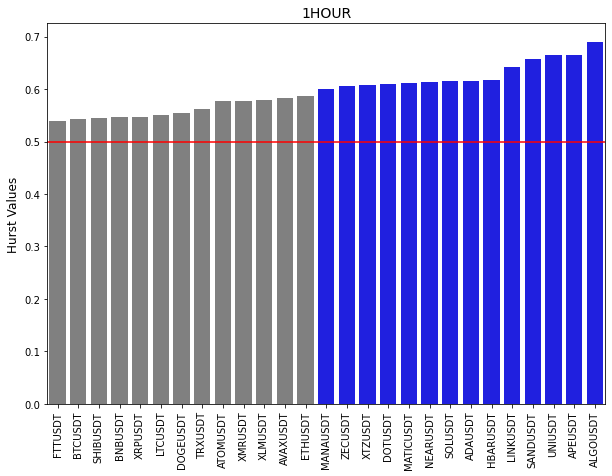

In [18]:
# Import compute_Hc module from hurst library
from hurst import compute_Hc

# Get Hurst exponenet of commodities
hurst = closes.apply(get_hurst)

# Plot Hurst exponent values
hurst_plot(hurst.sort_values(0), kline_interval)

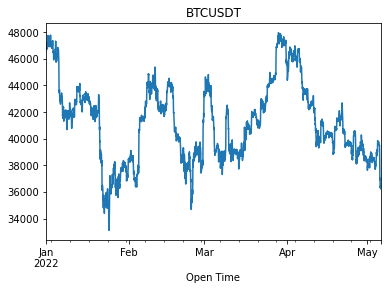

In [19]:
closes.BTCUSDT.plot(title='BTCUSDT')

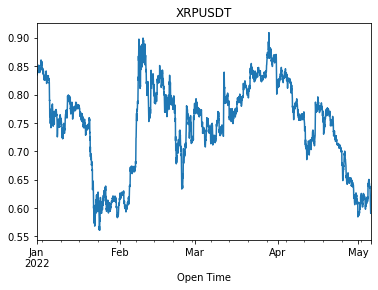

In [20]:
closes.XRPUSDT.plot(title='XRPUSDT')

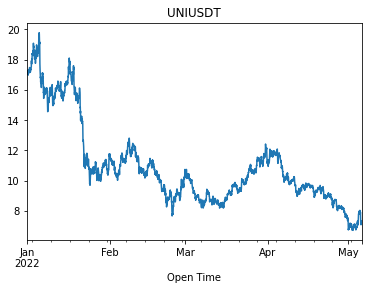

In [21]:
closes.UNIUSDT.plot(title='UNIUSDT')

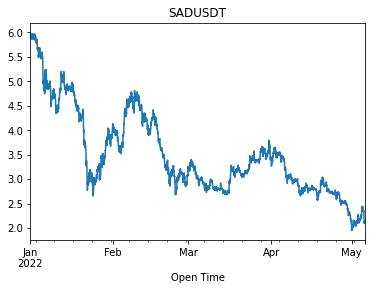

In [22]:
closes.SANDUSDT.plot(title='SADUSDT')